# 데이터 준비
- 데이터 로딩
- 코퍼스 원본 추출

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls "/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/6강/data"

adele.txt	       dolly-parton.txt        ludacris.txt
al-green.txt	       drake.txt	       michael-jackson.txt
alicia-keys.txt        dr-seuss.txt	       missy-elliott.txt
amy-winehouse.txt      eminem.txt	       nickelback.txt
beatles.txt	       janisjoplin.txt	       nicki-minaj.txt
bieber.txt	       jimi-hendrix.txt        nirvana.txt
bjork.txt	       johnny-cash.txt	       notorious_big.txt
blink-182.txt	       joni-mitchell.txt       notorious-big.txt
bob-dylan.txt	       kanye.txt	       nursery_rhymes.txt
bob-marley.txt	       kanye-west.txt	       patti-smith.txt
britney-spears.txt     Kanye_West.txt	       paul-simon.txt
bruce-springsteen.txt  lady-gaga.txt	       prince.txt
bruno-mars.txt	       leonard-cohen.txt       radiohead.txt
cake.txt	       lil-wayne.txt	       rihanna.txt
dickinson.txt	       Lil_Wayne.txt	       r-kelly.txt
disney.txt	       lin-manuel-miranda.txt
dj-khaled.txt	       lorde.txt


In [22]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
import os
import re

In [4]:
# 로컬 파일 경로
# txt_file_path = r"G:\내 드라이브\0. 인공지능 학습\아이펠 대전 3기\2. Exploration 수업\코드\6강\data\*.txt"
txt_file_path = "/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/6강/data/*.txt"
txt_list = glob(txt_file_path)

# 코퍼스 원본 추출
raw_corpus = []
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

print("가공 전 코퍼스 개수:", len(raw_corpus))
print("\n코퍼스 예시")
for i, c in enumerate(raw_corpus[:10]):
    print("코퍼스[{0}] : {1}".format(i, c))

가공 전 코퍼스 개수: 187088

코퍼스 예시
코퍼스[0] : Build your dreams to the stars above
코퍼스[1] : But when you need someone to love
코퍼스[2] : Don't go to strangers, darling, come to me Play with fire till your fingers burn
코퍼스[3] : And when there's no place for you to turn
코퍼스[4] : Don't go to strangers, darling, come to me For, when you hear a call to follow your heart
코퍼스[5] : You'll follow your heart I know
코퍼스[6] : I've been through it all, for I'm an old hand
코퍼스[7] : And I'll understand if you go So
코퍼스[8] : Make your mark for your friends to see
코퍼스[9] : But when you need more than company


# 데이터 전처리
- 대문자를 소문자로 변환
- 연속적 공백을 하나의 공백으로 변환
- 특수문자 삭제
- 문장 시작과 끝에 "start"와 "end"를 추가

In [5]:
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', " ", sentence) # 3
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<start> ' + sentence + ' <end>' # 6
    
    return sentence

In [6]:
corpus = []

for sentence in raw_corpus:
    if len(sentence) == 0: continue
    if sentence[-1] == ":": continue
    
    preprocessed_sentence = preprocess_sentence(sentence)
    corpus.append(preprocessed_sentence)
        
print("가공 후 코퍼스 예시")
for i, c in enumerate(corpus[:10]):
    print("코퍼스[{0}] : {1}".format(i, c))

가공 후 코퍼스 예시
코퍼스[0] : <start> build your dreams to the stars above <end>
코퍼스[1] : <start> but when you need someone to love <end>
코퍼스[2] : <start> don t go to strangers , darling , come to me play with fire till your fingers burn <end>
코퍼스[3] : <start> and when there s no place for you to turn <end>
코퍼스[4] : <start> don t go to strangers , darling , come to me for , when you hear a call to follow your heart <end>
코퍼스[5] : <start> you ll follow your heart i know <end>
코퍼스[6] : <start> i ve been through it all , for i m an old hand <end>
코퍼스[7] : <start> and i ll understand if you go so <end>
코퍼스[8] : <start> make your mark for your friends to see <end>
코퍼스[9] : <start> but when you need more than company <end>


# 코퍼스 토큰화 전 데이터 분석

In [7]:
def tokenize(corpus, min_corpus_len, max_corpus_len, padding):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=30000, 
        filters=' ',
        oov_token="<unk>"
    )

    tokenizer.fit_on_texts(corpus)
    tensors = tokenizer.texts_to_sequences(corpus)

    filtered_tensor = []
    for i in range(len(tensors)):
        if (min_corpus_len <= len(tensors[i])) and (len(tensors[i]) <= max_corpus_len):
            filtered_tensor.append(tensors[i])

    if padding == True:
        filtered_tensor = tf.keras.preprocessing.sequence.pad_sequences(filtered_tensor, padding='post')
    
    return filtered_tensor, tokenizer

In [8]:
tensor, tokenizer = tokenize(corpus, min_corpus_len=0, max_corpus_len=1000, padding=False)

In [9]:
tensor_len_list = []
for i in range(len(tensor[:])):
    tensor_len_list.append(len(tensor[i]))

sorted_tensor_idx = np.argsort(tensor_len_list).tolist()
sorted_tensor_idx.reverse()

sorted_tensor_len_list = []
for i in sorted_tensor_idx:
    sorted_tensor_len_list.append(tensor_len_list[i])

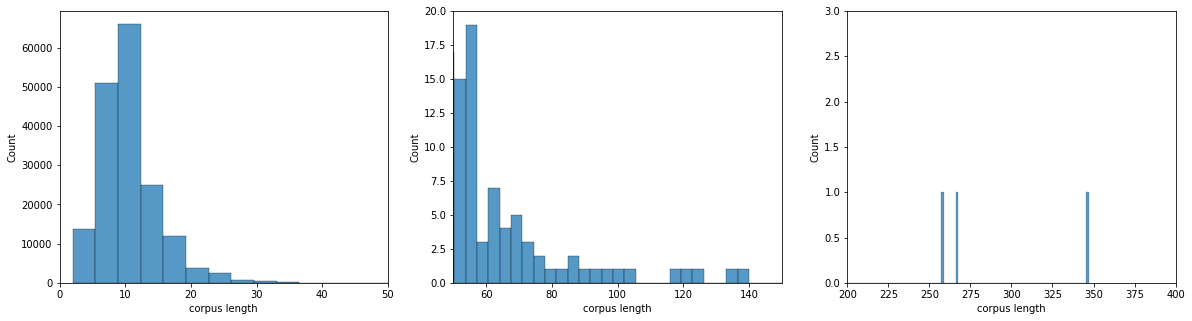

In [10]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.histplot(sorted_tensor_len_list[:], bins=100)
plt.xlabel("corpus length")
plt.xlim(0, 50)

plt.subplot(1, 3, 2)
sns.histplot(sorted_tensor_len_list[:], bins=100)
plt.xlabel("corpus length")
plt.xlim(50, 150)
plt.ylim(0, 20)

plt.subplot(1, 3, 3)
sns.histplot(sorted_tensor_len_list, bins=200)
plt.xlabel("corpus length")
plt.xlim(200, 400)
plt.ylim(0, 3)
plt.show()

- 코퍼스 길이의 분포를 확인해본 결과 대부분의 코퍼스 길이는 20 이하에 분포함.
- 코퍼스 길이가 너무 짧은 데이터로는 문장을 만들기 어렵기 때문에 코퍼스 길이가 5 ~ 20 사이의 데이터만 추출함.
- 코퍼스가 길어지면 임베딩 결과 데이터의 차원이 매우 커지기 때문에 학습 속도 및 성능 저하의 원인이 됨.

# 데이터 토큰화

In [11]:
tensor, tokenizer = tokenize(corpus, min_corpus_len=5, max_corpus_len=20, padding=True)

In [12]:
tensor_len_list = []
for i in range(len(tensor[:])):
    tensor_len_list.append(len(tensor[i]))

sorted_tensor_idx = np.argsort(tensor_len_list).tolist()
sorted_tensor_idx.reverse()

sorted_tensor_len_list = []
for i in sorted_tensor_idx:
    sorted_tensor_len_list.append(tensor_len_list[i])

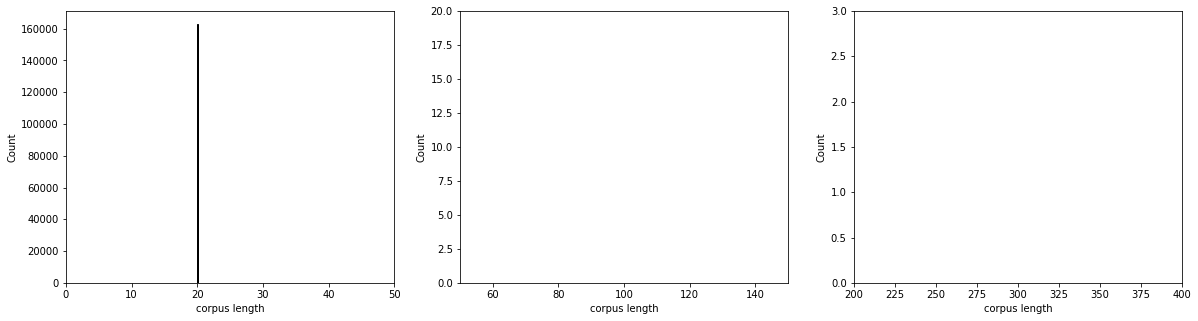

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.histplot(sorted_tensor_len_list[:], bins=10)
plt.xlabel("corpus length")
plt.xlim(0, 50)

plt.subplot(1, 3, 2)
sns.histplot(sorted_tensor_len_list[:], bins=100)
plt.xlabel("corpus length")
plt.xlim(50, 150)
plt.ylim(0, 20)

plt.subplot(1, 3, 3)
sns.histplot(sorted_tensor_len_list, bins=200)
plt.xlabel("corpus length")
plt.xlim(200, 400)
plt.ylim(0, 3)
plt.show()

- 전처리 결과 모든 코퍼스 길이가 20으로 변환되었음을 확인함.

In [14]:
src_input = tensor[:, :-1]
tgt_input = tensor[:, 1:]

- 입력 데이터의 끝부분과 타겟 데이터의 첫부분을 제거하여 시차가 1 차이나는 데이터를 생성함.

In [15]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

VOCAB_SIZE = tokenizer.num_words + 1   

dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset element_spec=(TensorSpec(shape=(256, 19), dtype=tf.int32, name=None), TensorSpec(shape=(256, 19), dtype=tf.int32, name=None))>

# 모델 설정

In [16]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out

- 두 층의 lstm 층과 dense 층을 갖는 모델을 설계

In [17]:
embedding_size = 256
hidden_size = 1024
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

In [18]:
for src_sample, tgt_sample in dataset.take(1): break

model(src_sample)

<tf.Tensor: shape=(256, 19, 30001), dtype=float32, numpy=
array([[[ 1.89364713e-04, -1.12657784e-04, -2.44726270e-05, ...,
         -7.40512914e-05, -7.65617733e-06, -7.17264338e-05],
        [ 1.68952276e-04, -2.18565401e-04, -1.74198925e-04, ...,
         -2.37760196e-05,  1.66556449e-04, -1.30526838e-04],
        [ 1.16598909e-04, -4.84564109e-04, -2.22821516e-04, ...,
         -1.14688373e-04,  3.60236096e-04, -1.12610083e-04],
        ...,
        [ 3.12170974e-04, -7.89240803e-05, -1.57514599e-03, ...,
         -8.90991709e-04,  6.43861422e-04, -3.26934154e-04],
        [ 2.91723612e-04, -3.09370189e-05, -1.75181346e-03, ...,
         -1.00186199e-03,  1.02904346e-03, -3.80299520e-04],
        [ 2.79438216e-04,  1.28417723e-05, -1.92080683e-03, ...,
         -1.10063527e-03,  1.44571799e-03, -4.19511343e-04]],

       [[ 1.89364713e-04, -1.12657784e-04, -2.44726270e-05, ...,
         -7.40512914e-05, -7.65617733e-06, -7.17264338e-05],
        [ 2.25947588e-04, -2.84748210e-04, -7

In [19]:
model.summary()

Model: "text_generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  7680256   
                                                                 
 lstm (LSTM)                 multiple                  5246976   
                                                                 
 lstm_1 (LSTM)               multiple                  8392704   
                                                                 
 dense (Dense)               multiple                  30751025  
                                                                 
Total params: 52,070,961
Trainable params: 52,070,961
Non-trainable params: 0
_________________________________________________________________


# Train/Valid 데이터셋 준비

In [26]:
x_train, x_valid, y_train, y_valid = train_test_split(src_input, tgt_input, test_size=0.2, random_state=7)

- sklearn 패키지 함수를 사용하여 train/valid 데이터셋을 분리함.
- test 과정에서는 사람이 입력하는 문장을 사용하기 때문에 test 데이터셋을 필요하지 않음.

# 학습 시작

In [27]:
epochs=10
batch_size = 256
learning_rate = 0.001

loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

model.compile(optimizer=keras.optimizers.Adam(learning_rate),
             loss=loss,
             metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(x_valid, y_valid))

Epoch 1/10
510/510 [==============================] - 252s 488ms/step - loss: 3.0649 - accuracy: 0.5692 - val_loss: 2.6516 - val_accuracy: 0.5978
Epoch 2/10
510/510 [==============================] - 250s 490ms/step - loss: 2.5299 - accuracy: 0.6051 - val_loss: 2.4897 - val_accuracy: 0.6091
Epoch 3/10
510/510 [==============================] - 250s 490ms/step - loss: 2.3857 - accuracy: 0.6138 - val_loss: 2.3971 - val_accuracy: 0.6158
Epoch 4/10
510/510 [==============================] - 250s 490ms/step - loss: 2.2751 - accuracy: 0.6209 - val_loss: 2.3306 - val_accuracy: 0.6219
Epoch 5/10
510/510 [==============================] - 250s 491ms/step - loss: 2.1776 - accuracy: 0.6279 - val_loss: 2.2769 - val_accuracy: 0.6269
Epoch 6/10
510/510 [==============================] - 250s 491ms/step - loss: 2.0883 - accuracy: 0.6348 - val_loss: 2.2344 - val_accuracy: 0.6319
Epoch 7/10
510/510 [==============================] - 250s 490ms/step - loss: 2.0065 - accuracy: 0.6417 - val_loss: 2.1973 -

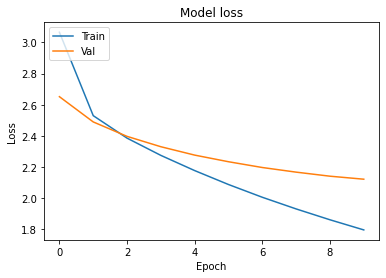

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [29]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]
    
    while True:
        predict = model(test_tensor) 
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)

        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

In [34]:
generate_text(model, tokenizer, init_sentence="<start> he has", max_len=15)

'<start> he has got a gun <end> '